# Illustrated Sequential Proportional Approval Voting

Plantsville is getting ready for a city council election, and this year they’ve switched to Proportional Representation.

Last year plantsville had an “at large” election, but Fruit didn’t get any representation, despite being one third of the population! 
That’s because while Vegetables are two thirds of the population, each vegetable candidate had more votes than every fruit candidate, so the board is all vegetables! 

> Show a council filled with vegetables, with fruit voters upset off to the side.

This year Plantsville is moving to Proportional Approval Voting. 
Proportional voting means each group of voters receives their fair share of seats on the city council. 

Here’s how Proportional Approval Voting works:

> Show three seats and six candidates. Two parties, fruit 🍉 , vegetables 🥦. Candidates: Squash, Potato, Broccoli, Blueberry, Strawberry, Banana

When you vote, voters pick all the candidates they approve. 

> Show existing Approval Voting Ballot explainer from previous Plantsville Video

The votes are in, and Broccoli has the most votes, and wins the first seat on the council. 

> Bar graph of votes with candidate image under it, on left is Broccoli who has the most votes. Broccoli will move up into the seats on top, and a shadow of their votes is left behind. 

The voters for Broccoli now have representation on the board. For the next round, voters with less representation have their weight relatively increased. For the second seat, all the voters who didn’t vote for Broccoli now have twice as much voting power relative to voters for Broccoli, to ensure that they get a fair chance to elect a candidate. 

> Show a transition from Round 1 to Round 2 vote counts, with a video game effect of the votes going from the bar to Broccoli like she's "winning" points and getting elected, but it consumes votes. The votes for the Vegetables shrink until it becomes equal to Round 2's image. On "The votes are recalculated" re-sort the graph so that Blueberry is the first because she has the most votes.

The votes are recalculated, and Blueberry wins the second seat, and blueberry voters also have their voting power adjusted. 
The process continues until all seats are filled. 

Now every group has fair representation, and democracy is restored.

> Endcard. 

Learn more about proportional approval voting, and the center for election science at our website, electionscience.org



In [419]:
import itertools
import pandas

# Compose Ballots
candidates = ['Squash', 'Potato',  'Broccoli', 'Blueberry', 'Strawberry', 'Banana']

ballot1 = {candidates[0]: 1, candidates[1]: 1, candidates[2]: 1, candidates[3]: 0, candidates[4]: 0, candidates[5]: 0}
ballot2 = {candidates[0]: 0, candidates[1]: 1, candidates[2]: 1, candidates[3]: 0, candidates[4]: 0, candidates[5]: 0}
ballot3 = {candidates[0]: 1, candidates[1]: 1, candidates[2]: 1, candidates[3]: 1, candidates[4]: 0, candidates[5]: 0}
ballot4 = {candidates[0]: 0, candidates[1]: 0, candidates[2]: 0, candidates[3]: 1, candidates[4]: 1, candidates[5]: 1}
ballot5 = {candidates[0]: 0, candidates[1]: 0, candidates[2]: 1, candidates[3]: 1, candidates[4]: 1, candidates[5]: 1}
ballot6 = {candidates[0]: 0, candidates[1]: 0, candidates[2]: 0, candidates[3]: 1, candidates[4]: 1, candidates[5]: 0}

# ballot_proportion = {ballot1: 112, ballot2: 6,
#  ballot3: 4, ballot4: 73, ballot5: 4, ballot6: 1}

ballots = list(itertools.repeat(ballot1, 112)) + \
    list(itertools.repeat(ballot2, 6)) + \
    list(itertools.repeat(ballot3, 4)) + \
    list(itertools.repeat(ballot4, 73)) + \
    list(itertools.repeat(ballot5, 4)) + \
    list(itertools.repeat(ballot6, 1))
ballots = pandas.DataFrame(ballots)


In [420]:
# At Large Winners
at_large_winners = ballots.sum().nlargest(3).index.to_list()
at_large_winners

['Broccoli', 'Potato', 'Squash']

In [421]:

# Code and setup.

seats = 3
elected = []
max_satisfaction = ballots.values.max()
round_number = 1


def plot_round_count(ballots):
    return ballots.sum().sort_values(ascending=False).plot(kind='bar', linewidth=1, ylim=(0, len(ballots)),
                              xlabel='Candidate', ylabel='Votes', title=f'Round {round_number} Count')


def reweight(ballot: pandas.DataFrame) -> pandas.DataFrame:
    satisfaction = ballot[ballot.index.isin(elected)].sum()
    weight = 1/(1+satisfaction/max_satisfaction)
    return ballot.apply(lambda x: weight*x)


def nextRound(ballots):
    global round_number
    round_number = round_number + 1
    reweighted = ballots.apply(reweight, axis=1)
    round_count = reweighted.sum().drop(
        elected, errors='ignore').sort_values(ascending=False)
    elected.append(round_count.idxmax())
    return reweighted, round_count


# Round 1

In round one we only need to count the candidate with the highest votes and then seat that them. In this case it's Blueberry.

Broccoli      126.0
Potato        122.0
Squash        116.0
Blueberry      82.0
Strawberry     78.0
Banana         77.0
dtype: float64
Elected: ['Broccoli']


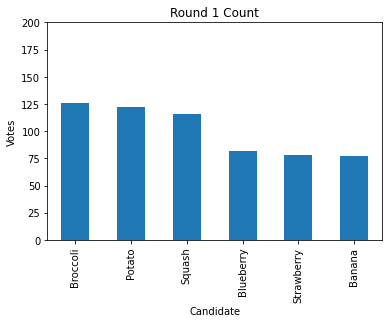

In [422]:
plot_round_count(ballots.apply(reweight, axis=1).drop(elected, axis=1))
ballots, round_count = nextRound(ballots)
print(round_count)
print(f"Elected: {elected }")


# Round 2

In round two we reweight the ballots. The biggest group of voters voted in support of Broccoli, Potato and Squash. Now that Broccoli is seated, these voters have $ 1 $ representative. Because they are represented, their votes for other candidates is reduced by the forumula $\frac{1}{(1+\frac{representation}{1})}$ which is $\frac{1}{(1+\frac{1}{1})}$ equal to $\frac{1}{2}$. Their votes for Squash and Potato are now each worth $\frac{1}{2}$.

Blueberry     78.0
Strawberry    76.0
Banana        75.0
Potato        61.0
Squash        58.0
dtype: float64
Elected: ['Broccoli', 'Blueberry']


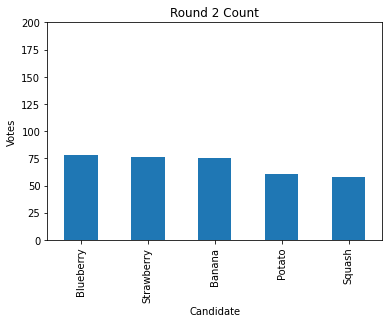

In [423]:
plot_round_count(ballots.apply(reweight, axis=1).drop(elected, axis=1))
ballots, round_count = nextRound(ballots)
print(round_count)
print(f"Elected: {elected }")


Because a lot of votes for Strawberry were correlated with vote for Broccoli, Potato, despite being in 2nd place in Round 1, doesn't have the highest score in Round 2. Blueberry has the highest score, and is elected.

# Round 3

In round 3 the votes for fruit candidates are reweighted and Vegetable candidates are able to get another seat. Vegetable candidates have $ \frac{2}{3} $ of the population, and how have \frac{2}{3} of the Plantsville City Council Seats. Fruit voters are happy now that they have fair representation on the city council, and democracy is restored.

Potato        40.333333
Squash        38.333333
Strawberry    38.000000
Banana        37.500000
dtype: float64
Elected: ['Broccoli', 'Blueberry', 'Potato']


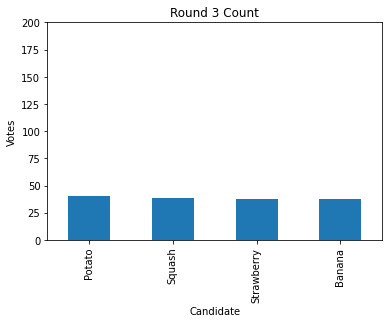

In [424]:
plot_round_count(ballots.apply(reweight, axis=1).drop(elected, axis=1))
ballots, round_count = nextRound(ballots)
print(round_count)
print(f"Elected: {elected }")
